# UQ SMP Programming Bootcamp (Python) V1

## Day 3: functions and a bit more.

We have already used in-built functions such as `print()` and `len()`.

We also create our own functions without giving it too much thought.

Functions are the basic building blocks of programs (classes are another building block - mostly beyond this bootcamp).

In [1]:
def my_function():
    print("A function that gets no arguments")

In [2]:
for _ in range(3):
    my_function() #invoking the function

A function that gets no arguments
A function that gets no arguments
A function that gets no arguments


In [3]:
def square_and_increment(x): #A function with an argument
    return x**2 + 1

In [4]:
square_and_increment(3)

10

In [5]:
[square_and_increment(x) for x in range(0,11)]

[1, 2, 5, 10, 17, 26, 37, 50, 65, 82, 101]

In [6]:
def make_age_string(name, age):
    return f"{name} is {age} years old"

In [7]:
make_age_string("Blake",24)

'Blake is 24 years old'

Of course functions can call other functions.

In [8]:
def make_age_string_with_tricks(name, age):
    age2 = square_and_increment(age)
    return f"{name} is {age} years old and their magic number is {age2}"

In [9]:
my_string = make_age_string_with_tricks("Blake", 24)
"Blake's string is " + my_string

"Blake's string is Blake is 24 years old and their magic number is 577"

#### Task 3.1: Write a function that take a list of numbers and returns their arithmatic mean (average). 

A function can also call itself. This is called recursion. Here is a classic example:

In [10]:
def my_factorial(n):
    if n == 0:
        return 1
    return n * my_factorial(n-1)

In [11]:
my_factorial(6)

720

#### Task 3.2 Write a recursive version of the collatz sequence (until hitting 1), each time printing the value as well.

A function can return multiple values by using a tuple. Tuples are interesting in their own right:

In [12]:
x = ("hello", 28)
type(x)

tuple

In [13]:
x = ("hello")
type(x)

str

In [14]:
x = ("hello",)
type(x)

tuple

In [15]:
x = ("hello", 28, -1.3)
len(x)

3

In [16]:
x[2]

-1.3

In [17]:
x = tuple() #empty tuple
x

()

Tuples are immutable (unlike lists).

In [18]:
x[2] = 2.8

TypeError: 'tuple' object does not support item assignment

In [19]:
x = ["hello", 28, -1.3]
x[2] = 2.8
x

['hello', 28, 2.8]

In [20]:
from math import *

In [21]:
def real_roots_of_quadratic(a, b, c):
    disc = b**2 - 4*a*c
    if disc < 0:
        return tuple() #empty tuple - no solutions.
    elif disc == 0:
        return (-b / 2 / a, ) #tuple of length 1 
    else: #disc >0
        return ((-b + sqrt(disc)) / 2 / a, (-b - sqrt(disc)) / 2 / a)

In [22]:
def check_qudratic(a, b, c, roots):
    f = lambda x: a*x**2 + b*x + c*x #This is a lambda function! 
    for r in roots:
        print(f(r))

In [23]:
roots = real_roots_of_quadratic(1,0,0)
roots

(0.0,)

In [24]:
check_qudratic(1, 0, 0, roots)

0.0


In [25]:
real_roots_of_quadratic(1,0,-1)

(1.0, -1.0)

In [26]:
check_qudratic(1, 0, -1, roots)

0.0


In [27]:
roots = real_roots_of_quadratic(-1,0,-1)

In [28]:
check_qudratic(-1, 0, -1, roots)

#### Task 3.3 Write function that gets a list of numbers and returns a tuple with the sample mean and sample standard deviation.

We can (should) document our functions.

In [29]:
def check_all_lower_case(str):
    #This function checks if the input string is all_lower case
    for c in str:
        if ord(c) >= ord('A') and ord(c) <= ord('Z'):
            return False
    return True

In [30]:
? check_all_lower_case

Signature:  check_all_lower_case(str)
Docstring: <no docstring>
File:      /var/folders/1r/48qlcl0n01q21sqtbnvn6m9c0000gp/T/ipykernel_28081/2099116852.py
Type:      function

In [31]:
check_all_lower_case("Miriam")

False

In [32]:
check_all_lower_case("miriam")

True

#### Task 3.4 Write a function checks if all characters are letters (upper case or lower case).

Variables have scope. For example a variable defined in one running program is not visible in another program. The same goes with functions.

In [33]:
a = 2
def my_func():
    a = 3 #This will not change a which is in global scope
    print("did nothing")

my_func()
print(a)

did nothing
2


In [34]:
a = 2
def my_func():
    global a
    a = 3 #This WILL change a which is in global scope
    print("did something")

my_func()
print(a)

did something
3


Python can have named arguments to functions with default values.

In [35]:
import math

In [36]:
def normal_density(x, mu = 0, sigma = 1):
    return 1/sqrt(2*math.pi) / sigma * exp(-((x-mu)/(2*sigma))**2)

Text(0, 0.5, 'Density')

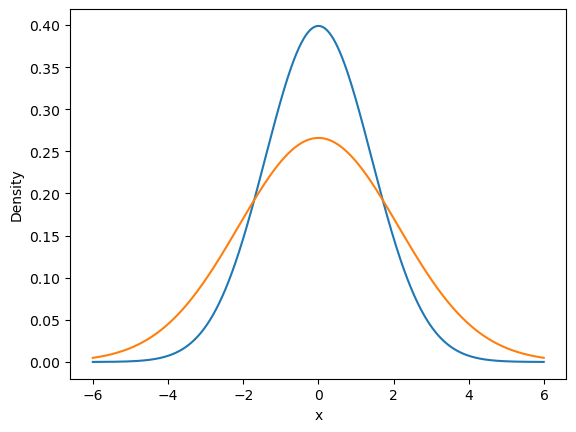

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(-6.0,6.0,0.01)
density_standard = [normal_density(x) for x in x_range]
density_wide = [normal_density(x, mu = 0, sigma = 1.5) for x in x_range]

plt.plot(x_range, density_standard)
plt.plot(x_range, density_wide)

plt.xlabel("x")
plt.ylabel("Density")

#### Task 3.5 Write function that gets another pure function (e.g. a normal density) and integrates it with specified limits using an approximation like,

$$
\int_{a}^b f(x) dx \approx \sum f(x) \delta
$$

The function will have arguments for the number of elements in the summation.

Test this on the normal densities above.

### Let's now focus on lists...

In [43]:
my_data = ["My name", 87, 23]

In [44]:
your_data = my_data

In [45]:
your_data[-1] = 100

In [46]:
my_data #Wow my_data is also changed. This is because both my_data and your_data point to the same list.

['My name', 87, 100]

In [47]:
my_data = ["My name", 87, 23]
your_data = my_data.copy() #Copy actually creates a copy of the list.
your_data[-1] = 100
my_data, your_data

(['My name', 87, 23], ['My name', 87, 100])

#### Task 3.6 Write function gets a list and returns a sorted version of the list.


There are a few functions for lists. Some of these are methods of the list class.

In [48]:
my_friends = ["jack", "jill"]
your_friends = ["emma", "lili"]
my_friends + your_friends

['jack', 'jill', 'emma', 'lili']

In [49]:
list1 = ["A", "B" , "C"]
list2 = ["D", "E"]

for x in list2:
  list1.append(x)

list1

['A', 'B', 'C', 'D', 'E']

In [50]:
'F' in list1, 'C' in list1 #you can use `in`

(False, True)

#### Task 3.7: Write a function that loops, asking us for friend's names and their phone numbers until we say "stop". It then returns a tuple with one list of names, and one list of phone numbers....

E.g. The return value can be like:

In [51]:
result = (["Kayley", "Emily", "Miriam"],["042424535", "042424125", "04235235"])

#### Task 3.8: Now write a function that gets a result and a name, it should return the phone number of the name, or otherwise return "nothing"

Lucikly, Python comes with a built in data structure that is very suitable for such lookup and other many cases.

In [52]:
data = {"Kayley": "042424535", "Emily": "042424125", "Miriam": "04235235" }

In [53]:
data["Kayley"] #we can now index based on the keys.

'042424535'

In [54]:
data.keys()

dict_keys(['Kayley', 'Emily', 'Miriam'])

In [55]:
data.values()

dict_values(['042424535', '042424125', '04235235'])

In [56]:
data["New friend"]="5124125"

In [57]:
data

{'Kayley': '042424535',
 'Emily': '042424125',
 'Miriam': '04235235',
 'New friend': '5124125'}

In [58]:
data["Imaginary friend"]

KeyError: 'Imaginary friend'

In [59]:
data

{'Kayley': '042424535',
 'Emily': '042424125',
 'Miriam': '04235235',
 'New friend': '5124125'}

In [60]:
del data['New friend']

In [61]:
data

{'Kayley': '042424535', 'Emily': '042424125', 'Miriam': '04235235'}

See more on the [Python docs](https://docs.python.org/3/tutorial/datastructures.html)

Python also has sets:

In [62]:
my_set = {"car", 245, "dog", (2,3)}

#### Task 3.9: Try to create a set with a list as an element. Discuss and investigate the error message that you get.

#### Task 3.10: In this task you will manipulate a dictionary based data structure for contacts...

Assume you have a contacts... where a contact is identified by a name.  These are the keys in the dictionary. Every contact has a key which itself a dictionary with the following keys: `phone_number` (string), `email` (string), `age` (int), and `friends` (set).

In [63]:
# for example
data = {"Ben": 
            {"phone_number": "35123532", 
             "email": "ben@onehop.com", 
             "age": 34, 
             "friends": {"Jacob", "Beth"}
            },
        "Lea":
            {"phone_number": "35345125652", 
             "email": "lea3523@gmail.com", 
             "age": 82, 
             "friends": {"Ben"}
            },
        "Jacob":
            {"phone_number": "3515252", 
             "email": "jake5@gmail.com", 
             "age": 22, 
             "friends": {}
            },
        "Beth":
            {"phone_number": "3562252", 
             "email": "jake5@gmail.com", 
             "age": 22, 
             "friends": {"Jacob", "Ben"}
            }
       }
data["Beth"]

{'phone_number': '3562252',
 'email': 'jake5@gmail.com',
 'age': 22,
 'friends': {'Ben', 'Jacob'}}

3.10 (a): Write a function that checks consistency between friends. For example, see that every friend of Ben exists and Ben is a friend of him as well. 

3.10 (b): Write a function that adds a new entry.

3.10 (c): Write a function that deletes an entry (for this it would need to potentially delete entries from the friends set of everyone).

<center>
    <h1>
        END OF DAY 3
    </h1>
</center>